# QuantumDotDesigner Example Notebook

This notebook provides an example usage of the `QuantumDotDesigner` module. We'll walk through the creation, modification, and visualization of quantum dot components.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import QuantumDotDesigner as qdd

from QuantumDotDesigner.helpers.helpers import mirror_points_along_path as mirror

After importing the QuantumDotDesigner module, we have access to various elements and components. You can see all available elements by running the following cell.

In [2]:
elements = [attr for attr in dir(qdd.elements) if not attr.startswith('__')]

elements

['Barrier',
 'Barrier_2',
 'ClavierGate',
 'FanOutLineBase',
 'FanOutLineCoarse',
 'FanOutLineFine',
 'Ohmic',
 'Plunger',
 'ScreeningGate']

The same also applies to components. Components are unit cells containing several elements in a certain configuration.

In [3]:
components = [attr for attr in dir(qdd.components) if not attr.startswith('__')]

components

['Clavier', 'FanOutLine', 'Sensor']

In [4]:
from QuantumDotDesigner.elements import Plunger, Barrier, ScreeningGate
from QuantumDotDesigner.components import Sensor, FanOutLine

Importing all required elements and components seperately, saves us some time and space when writing the code. Now calling Plunger is the same like calling qdd.elements.Plunger.

In [5]:
qdd.elements.Plunger == Plunger

True

## Main cell

The QuantumDotArray instance represents the main cell of the design, where all elements, components, unit cells, and fanout has to be added eventually.

In [6]:
qda = qdd.QuantumDotArray()

## Collection

Before we start defining any elements, we first have to initiliase a collection, in which all elements and components are stored.

In [7]:
collection = qdd.BaseCollection()


## Definitions

We'll start by defining the layers for our quantum dot components, and other basic properties.


In [8]:
ohmic_layer = 4
barrier_layer = 5
screening_layer = 32
barrier_source_layer = 5
barrier_drain_layer = 5
plunger_layer = 21

spacing_qd = 200e-3

## Elements/Components Definition

Next, we will define various elements such as plungers, barriers, and sensors.


### define plungers

In [9]:
pl = Plunger('plunger', collection)
pl.diameter = 150e-3
pl.layer = 21

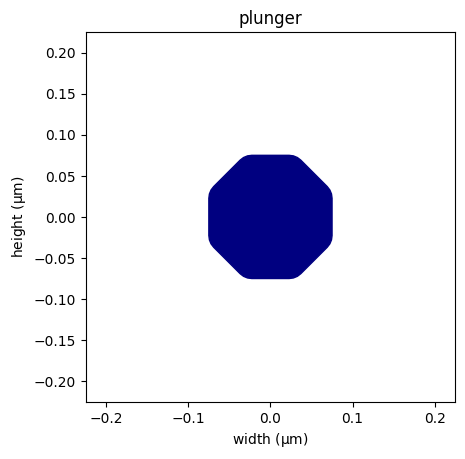

In [10]:
pl.build()
pl.plot()

### define barriers

In [11]:
bar_0deg = Barrier('barrier_0deg_rotated', collection)
bar_0deg.width = 40e-3
bar_0deg.length = 70e-3
bar_0deg.layer = 5
bar_0deg.rotate = 0/2*np.pi

We can simply create copies of elements and change single attributes. Here we only want to change the rotation of the barrier.

In [12]:
bar_90deg = bar_0deg.copy('barrier_90deg_rotated', collection)
bar_90deg.rotate = 1/2*np.pi

In [13]:
bar_180deg = bar_0deg.copy('barrier_180deg_rotated', collection)
bar_180deg.rotate = 2/2*np.pi

In [14]:
bar_270deg = bar_0deg.copy('barrier_270deg_rotated', collection)
bar_270deg.rotate = 3/2*np.pi

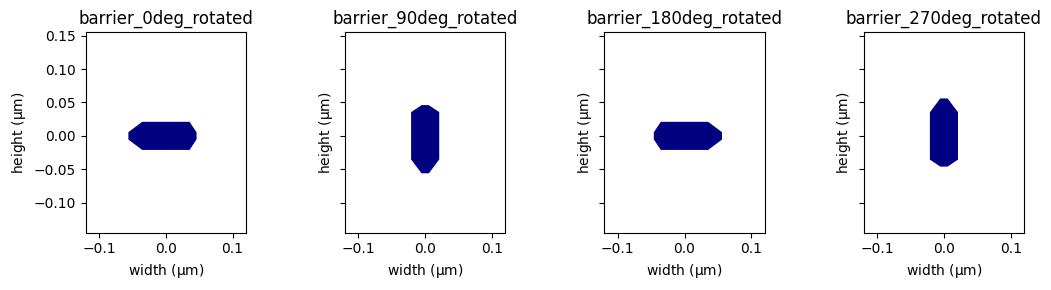

In [15]:
fig, axs = plt.subplots(1,4, figsize=(11, 3), sharex=True, sharey=True)

bar_0deg.build()
bar_0deg.plot(ax=axs[0])

bar_90deg.build()
bar_90deg.plot(ax=axs[1])

bar_180deg.build()
bar_180deg.plot(ax=axs[2])

bar_270deg.build()
bar_270deg.plot(ax=axs[3])

plt.tight_layout()

### define sensor

In [16]:
spacing_sep = 60e-3

sensor_top = Sensor('sensor_top', collection)

# for the positioning of the sensor element you can either indicate 'top',
# 'bottom', 'top-right', etc ...., or you indiacte the angle with 'top'
# corresponding to 0, 'top-right' corresponding to np.pi/4, etc ...
sensor_top.sep_pos = 'bottom-right'
# sensor_top.sep_pos_angle = 1/8*np.pi
sensor_top.source_pos = 'top-right'
# sensor_top.source_pos_angle = 3/8*np.pi
sensor_top.drain_pos = 'bottom-left'  # 1/8*np.pi
# sensor_top.drain_pos_angle = -3/8*np.pi

# the orientation of the sensor elements is indicated by the direction in
# which the end of the element points to, This can be either clockwise or
# counterclockwise
sensor_top.barrier_orientation['drain'] = 'counterclockwise'
sensor_top.barrier_orientation['source'] = 'clockwise'
sensor_top.barrier_orientation['sep'] = 'clockwise'

sensor_top.gap_sep = 60e-3
sensor_top.gap_ohmic_pl = 50e-3

sensor_top.plunger.diameter = 160e-3
sensor_top.plunger.layer = plunger_layer

sensor_top.barrier_source.width = 40e-3
sensor_top.barrier_source.length = 70e-3
sensor_top.barrier_source.layer = barrier_source_layer

sensor_top.barrier_drain.width = 40e-3
sensor_top.barrier_drain.length = 70e-3
sensor_top.barrier_drain.layer = barrier_drain_layer

sensor_top.barrier_sep.width = 50e-3
sensor_top.barrier_sep.length = 60e-3
sensor_top.barrier_sep.layer = screening_layer

sensor_top.source.layer = ohmic_layer
sensor_top.source.contact_length = 70e-3
sensor_top.drain.layer = ohmic_layer
sensor_top.drain.contact_length = 70e-3

In [17]:
sensor_bottom = sensor_top.copy('sensor_bottom', collection)
sensor_bottom.sep_pos = 'top-left'
sensor_bottom.source_pos = 'bottom-left'
sensor_bottom.drain_pos = 'top-right'

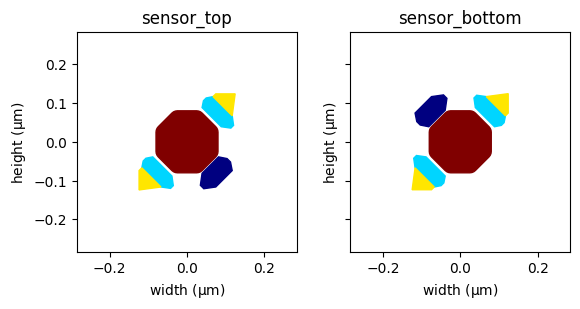

In [18]:
fig, axs = plt.subplots(1,2, figsize=(6, 3), sharex=True, sharey=True)

sensor_top.build()
sensor_top.plot(ax=axs[0])

sensor_bottom.build()
sensor_bottom.plot(ax=axs[1])

plt.tight_layout()

## Unit cell

Unit cells are instances to which we can add elements and components. Each component that we add can be placed on a sublattice with attributes center, rows, columns, and spacing. The same element or component can be added multiple times, such that all patterns can be created.

In [19]:
unit_cell = qdd.UnitCell('unit_cell')

### add plunger

In [20]:
uc_pl = unit_cell.add_component()

uc_pl.component = pl
uc_pl.center = (0, 0)
uc_pl.rows = 2
uc_pl.columns = 2
uc_pl.spacing = (spacing_qd, spacing_qd)

### add barriers

In [21]:
uc_bar_0deg = unit_cell.add_component()

uc_bar_0deg.component = bar_0deg
uc_bar_0deg.center = (spacing_qd/2, 0)

In [22]:
uc_bar_90deg = unit_cell.add_component()

uc_bar_90deg.component = bar_90deg
uc_bar_90deg.center = (0, spacing_qd/2)

In [23]:
uc_bar_180deg = unit_cell.add_component()

uc_bar_180deg.component = bar_180deg
uc_bar_180deg.center = (-spacing_qd/2, 0)

In [24]:
uc_bar_270deg = unit_cell.add_component()

uc_bar_270deg.component = bar_270deg
uc_bar_270deg.center = (0, -spacing_qd/2)

### add sensor

In [25]:
sensor_pos_uniy = (spacing_qd/2 +
                   2**0.5/2*(pl.diameter/2 * pl.asymy +
                             sensor_top.gap_sep +
                             sensor_top.plunger.diameter/2 *
                             sensor_top.plunger.asymy))

sensor_pos_unix = (spacing_qd/2 +
                   2**0.5/2*(pl.diameter/2 * pl.asymx +
                             sensor_top.gap_sep +
                             sensor_top.plunger.diameter/2 *
                             sensor_top.plunger.asymx))

In [26]:
uc_st = unit_cell.add_component()
uc_st.component = sensor_top
uc_st.center = (-sensor_pos_unix, sensor_pos_uniy)

In [27]:
uc_sb = unit_cell.add_component()
uc_sb.component = sensor_bottom
uc_sb.center = (sensor_pos_unix, -sensor_pos_uniy)

### plot unit cell

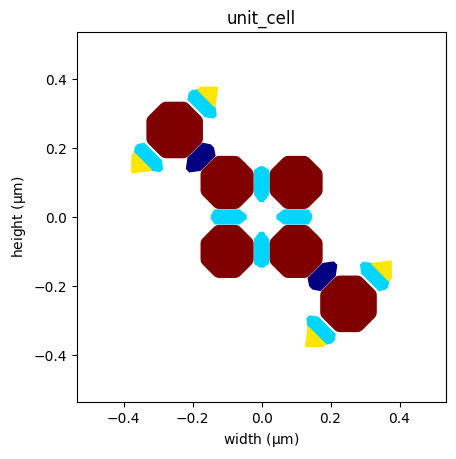

In [28]:
unit_cell.build()
unit_cell.plot()

### add to main cell

When adding the unit cell to the main cell, we could place it on a sublattice again. But here, we are creating only a single one centered at (0,0), i.e. we do not have to specific anything further.

In [29]:
uc_unitcell = qda.add_component()
uc_unitcell.component = unit_cell

## Fanout

The Fanout object collects all FanOutLine object that we create, and can be added to the QuantumDotArray object later.

In [30]:
fo = qdd.Fanout('fanout')

### Fanout Points

For the fanout we have to start by creating the fanout points with the FanoutPoints class. This class calculates the coarse fanout, by taking into account the number of lines at each side of the chip.

In [31]:
fo_points = qdd.FanoutPoints(qda)

First the number of bondpads for each side of the chip has to be set.

In [32]:
fo_points.fanout_counts = {'top': 6, 'bottom': 6, 'left': 7, 'right': 7}

Then we can set the point at which the coarse fanout starts, calculated from the center. Here, we set it to 16 micrometer for x- and y-direction. At the start, the spacing between the lines is set to 2 microemeters, the width to 1 micrometer.

In [33]:
fo_points.fo_stages[0] = (16, 16)
fo_points.fo_widths[0] = 1 
fo_points.spacings[0] = 2

For the bondpads the spacing can be set likewise, and the bondpad size can be set individually for all four sides of the chip.

In [34]:
fo_points.spacings[-1] = 250

fo_points.bondpad_size = {'top': (110, 400), 'bottom': (110, 400),
                          'left': (400, 110), 'right': (400, 110)}

Evenetually, we have to create the coarse fanout points. Then it can be used to create fanout lines.

In [35]:
fo_points.create_fo_polygons_coarse()

### Fanout plunger

For the creation of fanout lines, we have to give four arguments. The first argument is the name of the element that we want to fanout. We can access the names of all our elements in the collection.

In [36]:
collection.elements.keys()

dict_keys(['plunger', 'barrier_0deg_rotated', 'barrier_90deg_rotated', 'barrier_180deg_rotated', 'barrier_270deg_rotated', 'sensor_top_plunger', 'sensor_top_barrier_source', 'sensor_top_barrier_drain', 'sensor_top_source', 'sensor_top_drain', 'sensor_top_barrier_seperation', 'sensor_bottom_plunger', 'sensor_bottom_barrier_source', 'sensor_bottom_barrier_drain', 'sensor_bottom_source', 'sensor_bottom_drain', 'sensor_bottom_barrier_seperation'])

The second argument is the element number that we want to fanout. In this design, we have created 4 plunger elements placed on a 2x2 lattice. We count the element number from top-left to bottom-right, just like reading a book. Hence, element number 0 is top-left, element number 1 is top-right, element number 2 is bottom-left, and element number 3 is bottom-right.

The third and forth argument is the Collection class instance, and the FanoutPoints class instance.

#### Fanout plunger 0

In [37]:
fo_pl_0 = FanOutLine('plunger', 0, collection, fo_points)

After initialising the FanOutLine object successfully, the fanout direction and the fanout line number can be changed. The fanout line number is always counted from left to right, and top to bottom.

In [38]:
fo_pl_0.fo_direction = 'left'
fo_pl_0.n_fanout = 4

The fine fanout from the element to the coarse fanout can be modified with the fo_line_fine.points_along_path attribute. It constitutes a list, where each entry corresponds to a point, and a note. The note can be 'abs', 'start', 'prev', and 'dif', and determines how the given point is interpreted. 'abs' corresponds to an absolute coordinate, 'start' to a relative coordinate from the element position, 'prev' to a relative coordinate from the previous point, and 'dif' to a ratio between the start and end point.

In [39]:
fo_pl_0.fo_line_fine.fo_width_start = 40e-3
fo_pl_0.fo_line_fine.points_along_path = [[-0.15, -0.05, 'start'],
                                          [-0.4, -0.1, 'prev']
                                          ]

In [40]:
fo.add_component(fo_pl_0)

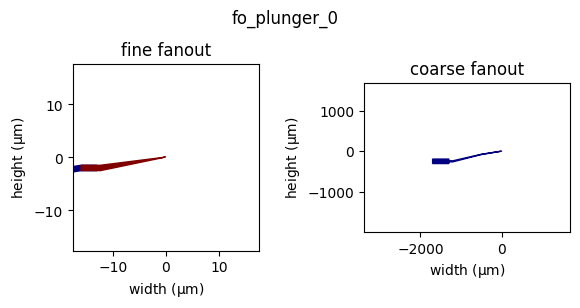

In [41]:
fo_pl_0.plot()

#### Fanout plunger 1

The same procedure can be repated for the other plungers. Keep in mind that the element number changes.

In [42]:
fo_pl_1 = FanOutLine('plunger', 1, collection, fo_points)

In [43]:
fo_pl_1.fo_direction = 'right'
fo_pl_1.n_fanout = 0

In [44]:
fo_pl_1.fo_line_fine.fo_width_start = 40e-3
fo_pl_1.fo_line_fine.points_along_path = [[0.6, 0.6, 'start']
                                          ]

In [45]:
fo.add_component(fo_pl_1)

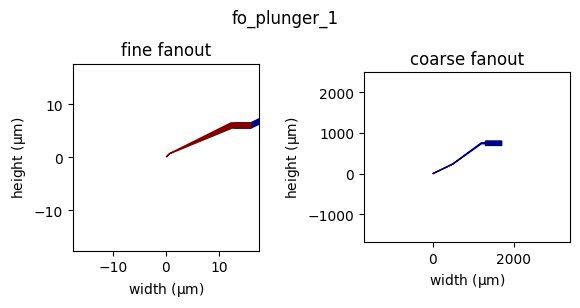

In [46]:
fo_pl_1.plot()

#### Fanout plunger 2

In [47]:
fo_pl_2 = FanOutLine('plunger', 2, collection, fo_points)

In [48]:
fo_pl_2.fo_direction = 'left'
fo_pl_2.n_fanout = -1

The fanout of plunger 2 is the same like plunger 1. We can mirror the **fo_line_fine.points_along_path** by using the **mirror_points_along_path** function that has been imported as **mirror**.

In [49]:
fo_pl_2.fo_line_fine.fo_width_start = 40e-3
points = mirror(fo_pl_1.fo_line_fine.points_along_path)
fo_pl_2.fo_line_fine.points_along_path = points

In [50]:
fo.add_component(fo_pl_2)

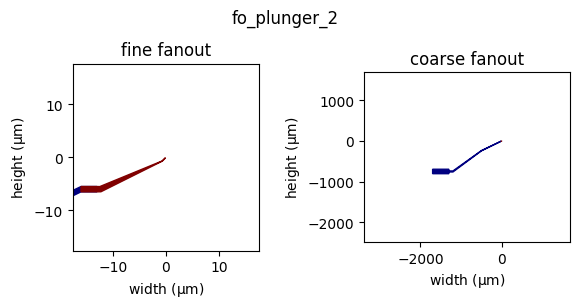

In [51]:
fo_pl_2.plot()

#### Fanout plunger 3

In [52]:
fo_pl_3 = FanOutLine('plunger', 3, collection, fo_points)

In [53]:
fo_pl_3.fo_direction = 'right'
fo_pl_3.n_fanout = 2

The fanout of plunger 3 is the same like plunger 0. Again, we can mirror the **fo_line_fine.points_along_path** by using the **mirror_points_along_path** function that has been imported as **mirror**.

In [54]:
fo_pl_3.fo_line_fine.fo_width_start = 40e-3
points = mirror(fo_pl_0.fo_line_fine.points_along_path)
fo_pl_3.fo_line_fine.points_along_path = points

In [55]:
fo.add_component(fo_pl_3)

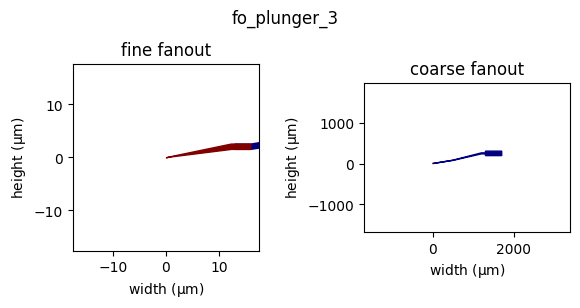

In [56]:
fo_pl_3.plot()

### Fanout barriers

The same procedure like for the plungers can alsi be applied for the barriers.

#### Fanout bar 0deg

In [57]:
fo_bar_0deg_0 = FanOutLine('barrier_0deg_rotated', 0, collection, fo_points)

fo_bar_0deg_0.fo_direction = 'right'
fo_bar_0deg_0.n_fanout = 1

fo_bar_0deg_0.fo_line_fine.fo_width_start = 40e-3
fo_bar_0deg_0.fo_line_fine.points_along_path = [[0.1, 0, 'start'],
                                                [0.1, 0.03, 'prev'],
                                                [0.2, 0.1, 'prev']
                                                ]
fo.add_component(fo_bar_0deg_0)

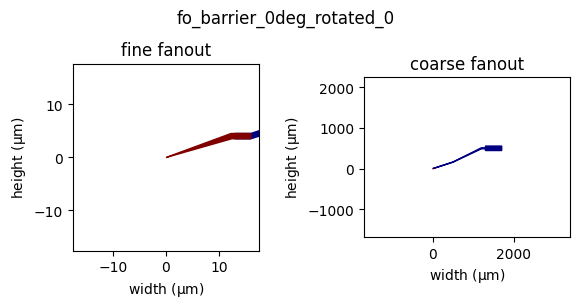

In [58]:
fo_bar_0deg_0.plot()

### Fanout bar 90deg

In [59]:
fo_bar_90deg_0 = FanOutLine('barrier_90deg_rotated', 0, collection, fo_points)

fo_bar_90deg_0.fo_direction = 'top'
fo_bar_90deg_0.n_fanout = 4

fo_bar_90deg_0.fo_line_fine.fo_width_start = 40e-3
fo_bar_90deg_0.fo_line_fine.points_along_path = [[0, 0.1, 'start'],
                                                 [0.03, 0.1, 'prev'],
                                                 [0.1, 0.2, 'prev']
                                                 ]
fo.add_component(fo_bar_90deg_0)

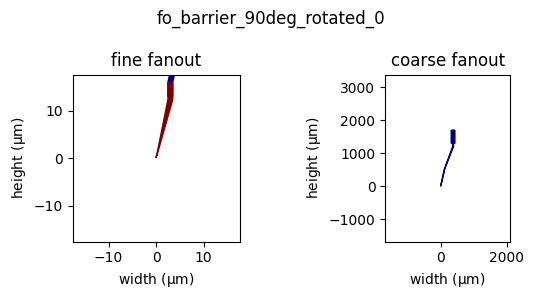

In [60]:
fo_bar_90deg_0.plot()

#### Fanout bar 180deg 0

In [61]:
fo_bar_180deg_0 = FanOutLine('barrier_180deg_rotated', 0, collection, fo_points)

fo_bar_180deg_0.fo_direction = 'left'
fo_bar_180deg_0.n_fanout = 5

fo_bar_180deg_0.fo_line_fine.fo_width_start = 40e-3
points = mirror(fo_bar_0deg_0.fo_line_fine.points_along_path)
fo_bar_180deg_0.fo_line_fine.points_along_path = points

fo.add_component(fo_bar_180deg_0)

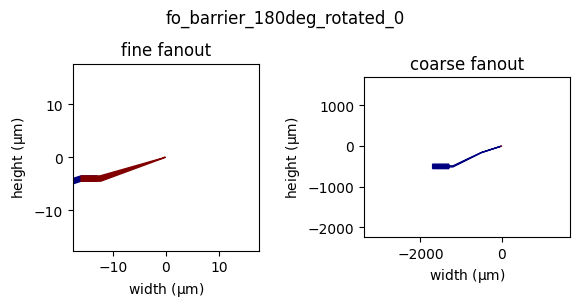

In [62]:
fo_bar_180deg_0.plot()

#### Fanout bar 270deg

In [63]:
fo_bar_270deg_0 = FanOutLine(
    'barrier_270deg_rotated', 0, collection, fo_points)

fo_bar_270deg_0.fo_direction = 'bottom'
fo_bar_270deg_0.n_fanout = 1

fo_bar_270deg_0.fo_line_fine.fo_width_start = 40e-3
points = mirror(fo_bar_90deg_0.fo_line_fine.points_along_path)
fo_bar_270deg_0.fo_line_fine.points_along_path = points

fo.add_component(fo_bar_270deg_0)

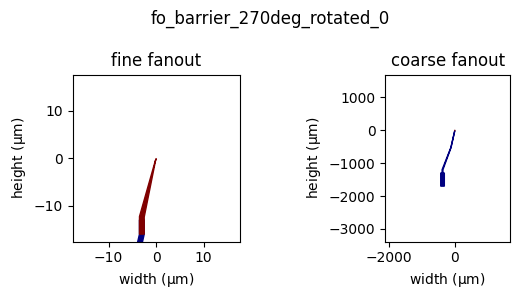

In [64]:
fo_bar_270deg_0.plot()

### Fanout sensor top

#### Fanout sensor plunger top

In [65]:
fo_sens_pl_top = FanOutLine('sensor_top_plunger', 0, collection, fo_points)

fo_sens_pl_top.fo_direction = 'left'
fo_sens_pl_top.n_fanout = 0

fo_sens_pl_top.fo_line_fine.fo_width_start = 40e-3
fo_sens_pl_top.fo_line_fine.points_along_path = [[-0.5, 0.5, 'start', 40e-3]
                                                 ]
fo.add_component(fo_sens_pl_top)

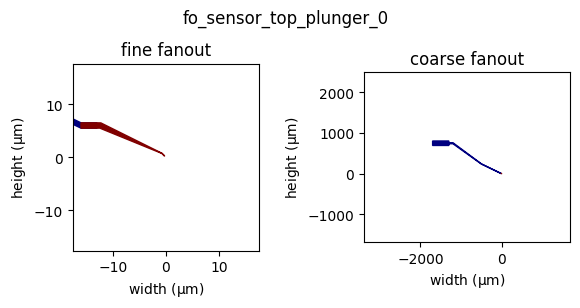

In [66]:
fo_sens_pl_top.plot()

#### Fanout sensor source top

In [67]:
fo_sens_top_source = FanOutLine(
    'sensor_top_source', 0, collection, fo_points)

fo_sens_top_source.fo_direction = 'top'
fo_sens_top_source.n_fanout = 2

fo_sens_top_source.fo_line_fine.points_along_path = [[0, 0.4, 'start'],
                                                     [-0.04, 0.4, 'prev']
                                                     ]
fo.add_component(fo_sens_top_source)

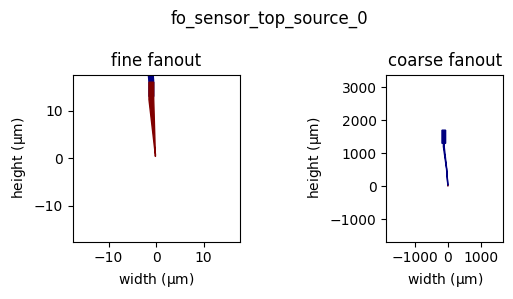

In [68]:
fo_sens_top_source.plot()

#### Fanout sensor drain top

In [69]:
fo_sens_top_drain = FanOutLine(
    'sensor_top_drain', 0, collection, fo_points)

fo_sens_top_drain.fo_direction = 'left'
fo_sens_top_drain.n_fanout = 2

fo_sens_top_drain.fo_line_fine.points_along_path = [[-0.25, -0.01, 'start']
                                                    ]
fo.add_component(fo_sens_top_drain)

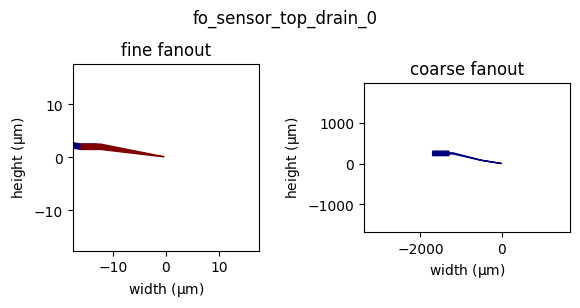

In [70]:
fo_sens_top_drain.plot()

#### Fanout sensor source barrier top

In [71]:
fo_sens_top_bar_source = FanOutLine(
    'sensor_top_barrier_source', 0, collection, fo_points)

fo_sens_top_bar_source.fo_direction = 'top'
fo_sens_top_bar_source.n_fanout = 1

fo_sens_top_bar_source.fo_line_fine.points_along_path = [[-0.1, 0.1, 'start'],
                                                         [-0.1, 0.2, 'prev']
                                                         ]
fo.add_component(fo_sens_top_bar_source)

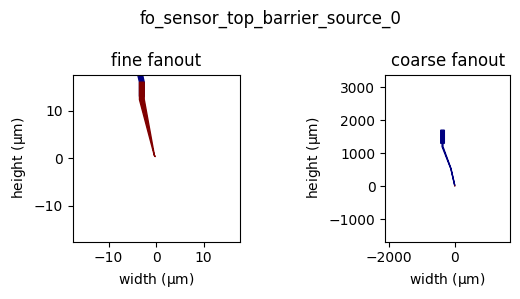

In [72]:
fo_sens_top_bar_source.plot()

#### Fanout sensor drain barrier top

In [73]:
fo_sens_top_bar_drain = FanOutLine(
    'sensor_top_barrier_drain', 0, collection, fo_points)

fo_sens_top_bar_drain.fo_direction = 'left'
fo_sens_top_bar_drain.n_fanout = 1

fo_sens_top_bar_drain.fo_line_fine.points_along_path = [[-0.1, 0.1, 'start'],
                                                        [-0.2, 0.1, 'prev']
                                                        ]
fo.add_component(fo_sens_top_bar_drain)

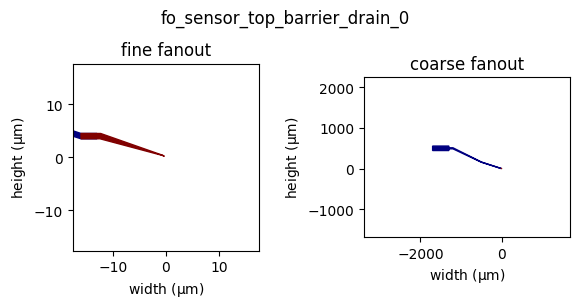

In [74]:
fo_sens_top_bar_drain.plot()

#### Fanout sensor sep barrier top

In [75]:
fo_sens_top_bar_sep = FanOutLine(
    'sensor_top_barrier_seperation', 0, collection, fo_points)

fo_sens_top_bar_sep.fo_direction = 'top'
fo_sens_top_bar_sep.n_fanout = 3

fo_sens_top_bar_sep.fo_line_fine.points_along_path = [[0.1, 0.1, 'start'],
                                                      [0.1, 0.2, 'prev'],
                                                      [0, 0.3, 'prev']
                                                      ]
fo.add_component(fo_sens_top_bar_sep)

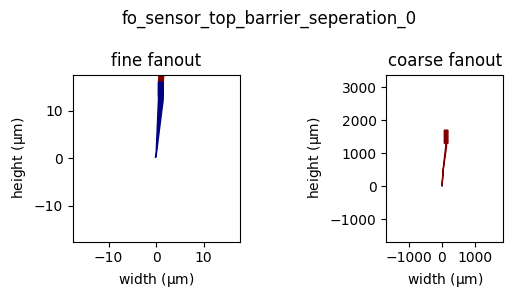

In [76]:
fo_sens_top_bar_sep.plot()

### Fanout sensor bottom

#### Fanout sensor plunger bottom

In [77]:
fo_sens_pl_bottom = FanOutLine(
    'sensor_bottom_plunger', 0, collection, fo_points)

fo_sens_pl_bottom.fo_direction = 'right'
fo_sens_pl_bottom.n_fanout = -1

fo_sens_pl_bottom.fo_line_fine.fo_width_start = 40e-3
points = mirror(fo_sens_pl_top.fo_line_fine.points_along_path)
fo_sens_pl_bottom.fo_line_fine.points_along_path = points

fo.add_component(fo_sens_pl_bottom)

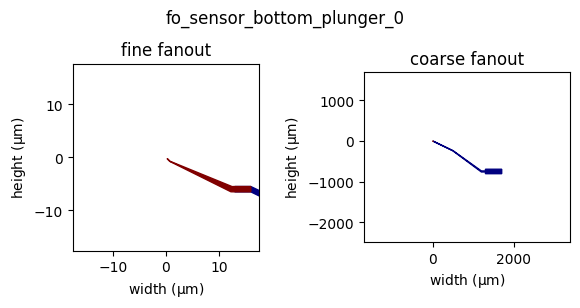

In [78]:
fo_sens_pl_bottom.plot()

#### Fanout sensor source bottom

In [79]:
fo_sens_bottom_source = FanOutLine('sensor_bottom_source', 0, collection, fo_points)

fo_sens_bottom_source.fo_direction = 'bottom'
fo_sens_bottom_source.n_fanout = 3

points = mirror(fo_sens_top_source.fo_line_fine.points_along_path)
fo_sens_bottom_source.fo_line_fine.points_along_path = points

fo.add_component(fo_sens_bottom_source)

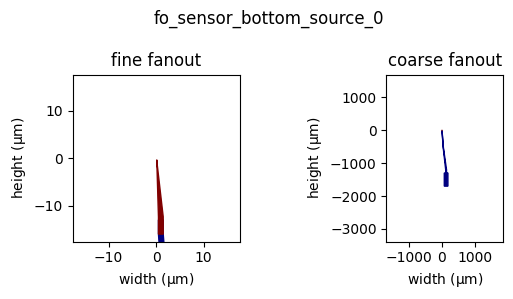

In [80]:
fo_sens_bottom_source.plot()

#### Fanout sensor drain bottom

In [81]:
fo_sens_bottom_drain = FanOutLine('sensor_bottom_drain', 0, collection, fo_points)

fo_sens_bottom_drain.fo_direction = 'right'
fo_sens_bottom_drain.n_fanout = 4

points = mirror(fo_sens_top_drain.fo_line_fine.points_along_path)
fo_sens_bottom_drain.fo_line_fine.points_along_path = points

fo.add_component(fo_sens_bottom_drain)

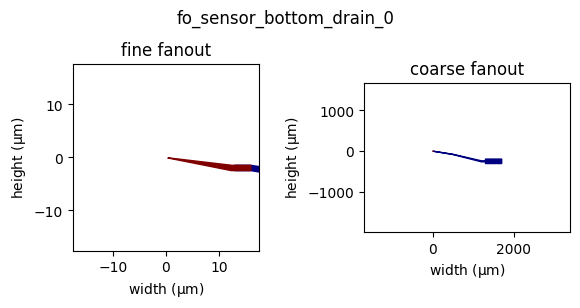

In [82]:
fo_sens_bottom_drain.plot()

#### Fanout sensor source barrier bottom

In [83]:
fo_sens_bottom_bar_source = FanOutLine('sensor_bottom_barrier_source', 0, collection, fo_points)

fo_sens_bottom_bar_source.fo_direction = 'bottom'
fo_sens_bottom_bar_source.n_fanout = 4

points = mirror(fo_sens_top_bar_source.fo_line_fine.points_along_path)
fo_sens_bottom_bar_source.fo_line_fine.points_along_path = points

fo.add_component(fo_sens_bottom_bar_source)

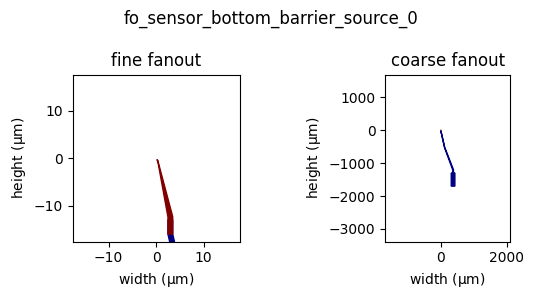

In [84]:
fo_sens_bottom_bar_source.plot()

#### Fanout sensor drain barrier bottom

In [85]:
fo_sens_bottom_bar_drain = FanOutLine(
    'sensor_bottom_barrier_drain', 0, collection, fo_points)

fo_sens_bottom_bar_drain.fo_direction = 'right'
fo_sens_bottom_bar_drain.n_fanout = 5

points = mirror(fo_sens_top_bar_drain.fo_line_fine.points_along_path)
fo_sens_bottom_bar_drain.fo_line_fine.points_along_path = points

fo.add_component(fo_sens_bottom_bar_drain)

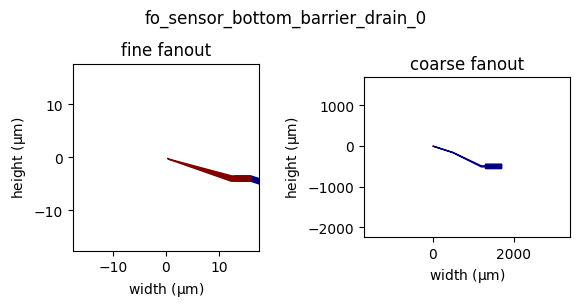

In [86]:
fo_sens_bottom_bar_drain.plot()

#### Fanout sensor sep barrier bottom

In [87]:
fo_sens_bottom_bar_sep = FanOutLine(
    'sensor_bottom_barrier_seperation', 0, collection, fo_points)

fo_sens_bottom_bar_sep.fo_direction = 'bottom'
fo_sens_bottom_bar_sep.n_fanout = 2

points = mirror(fo_sens_top_bar_sep.fo_line_fine.points_along_path)
fo_sens_bottom_bar_sep.fo_line_fine.points_along_path = points

fo.add_component(fo_sens_bottom_bar_sep)

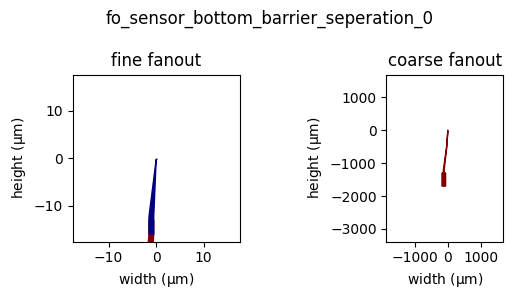

In [88]:
fo_sens_bottom_bar_sep.plot()

## Screening gates

After creating the fanout lines for most of our elements, we can create screening gates along these fanout lines. Here we want to screen the fanout lines of all plunger elements, inclusing the sensor.

### Plunger screening

#### Plunger 0 screening

In [89]:
screen_pl_0 = ScreeningGate('screening_gate_pl_0', collection)

After initilising the ScreeningGate object, we can indicate the fanout line to screen by indicating the element name, and element number. The third attribute is a list indicating the area, which shall be screened. Here, we start screening the fanout line from 0.1 um to 0.4 um. We have also set a way point at 0.3 um. Way points are useful when controlling the width of the screening gate. The width is controlled with the fourth attribute and has the same number of entries as the previous list. For each point we can assign here a width. When a float object is given, it applied the width euqally cenetered around the fanout line. When a tuple is given it applies different width for each side. For example, for connecting the screening gate we increase the width only one onde side.

In [90]:
screen_pl_0.screen('plunger', 0,
                   [0.1, 0.3, 0.4], [50e-3, 50e-3, (25e-3, 75e-3)])

To indiacte where the fanout line has to contact the screening gate, we have to give the **fo_contact_direction**. It can be either **0** or **1**.

In [91]:
screen_pl_0.fo_contact_direction = 1

In [92]:
screen_pl_0.layer = screening_layer
screen_pl_0.fo_contact_width = 50e-3

In [93]:
screen_pl_0_qda = qda.add_component()
screen_pl_0_qda.component = screen_pl_0

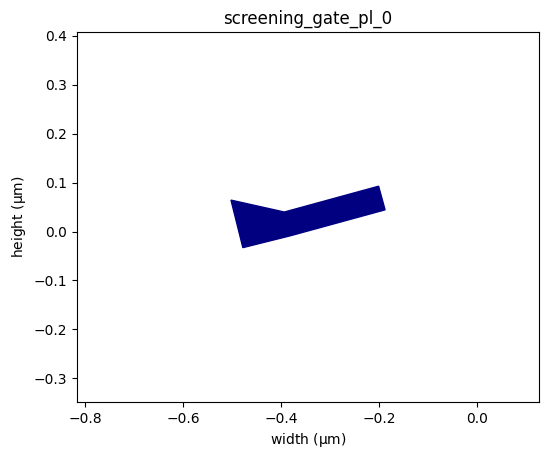

In [94]:
screen_pl_0.build()
screen_pl_0.plot()

#### Plunger 1 screening

The same principles also apply for the other screening gates.

In [95]:
screen_pl_1 = ScreeningGate('screening_gate_pl_1', collection)

In [96]:
screen_pl_1.screen('plunger', 1,
                   [0.1, 0.3, 0.4], [50e-3, 50e-3, (75e-3, 25e-3)])

In [97]:
screen_pl_1.fo_contact_direction = 0

In [98]:
screen_pl_1.layer = screening_layer
screen_pl_1.fo_contact_width = 50e-3

In [99]:
screen_pl_1_qda = qda.add_component()
screen_pl_1_qda.component = screen_pl_1

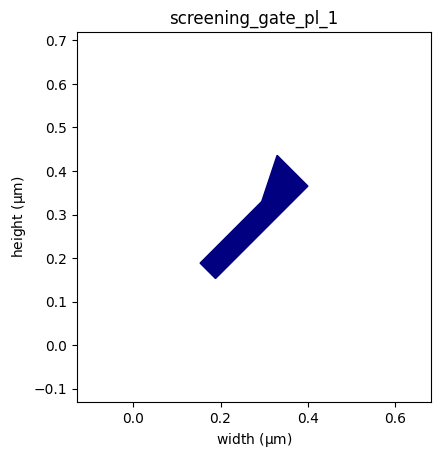

In [100]:
screen_pl_1.build()
screen_pl_1.plot()

#### Plunger 2 screening

In [101]:
screen_pl_2 = ScreeningGate('screening_gate_pl_2', collection)

screen_pl_2.screen('plunger', 2,
                   [0.1, 0.3, 0.4], [50e-3, 50e-3, (75e-3, 25e-3)])
screen_pl_2.fo_contact_direction = 0
screen_pl_2.layer = screening_layer
screen_pl_2.fo_contact_width = 50e-3


screen_pl_2_qda = qda.add_component()
screen_pl_2_qda.component = screen_pl_2

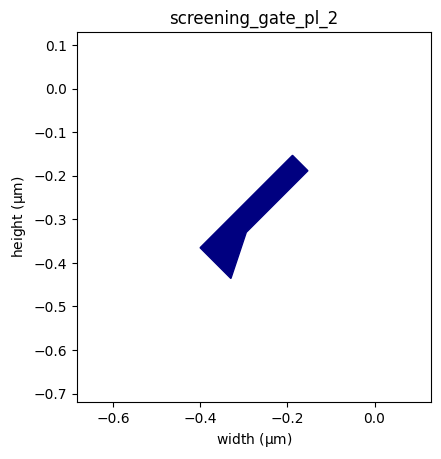

In [102]:
screen_pl_2.build()
screen_pl_2.plot()

#### Plunger 3 screening

In [103]:
screen_pl_3 = ScreeningGate('screening_gate_pl_3', collection)

screen_pl_3.screen('plunger', 3,
                   [0.1, 0.3, 0.4], [50e-3, 50e-3, (25e-3, 75e-3)])
screen_pl_3.fo_contact_direction = 1
screen_pl_3.layer = screening_layer
screen_pl_3.fo_contact_width = 50e-3

screen_pl_3_qda = qda.add_component()
screen_pl_3_qda.component = screen_pl_3

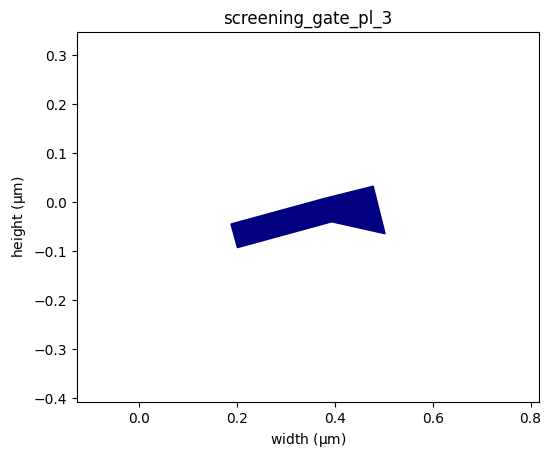

In [104]:
screen_pl_3.build()
screen_pl_3.plot()

### Sensor plunger screening

#### Plunger sens top plunger screening

In [105]:
screen_sens_pl_top = ScreeningGate('screening_gate_sens_pl_top',
                                   collection)

screen_sens_pl_top.screen('sensor_top_plunger', 0,
                          [0.1, 0.3, 0.4], [50e-3, 50e-3, (25e-3, 75e-3)])
screen_sens_pl_top.fo_contact_direction = 1
screen_sens_pl_top.layer = screening_layer
screen_sens_pl_top.fo_contact_width = 50e-3

screen_sens_pl_top_qda = qda.add_component()
screen_sens_pl_top_qda.component = screen_sens_pl_top

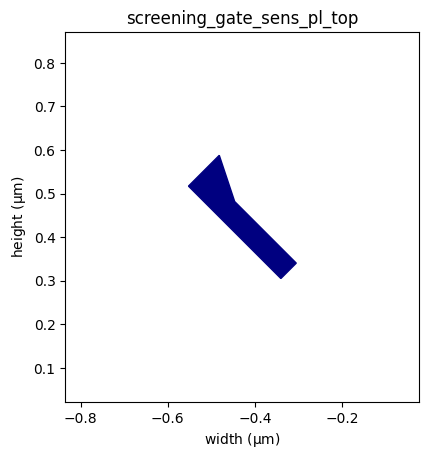

In [106]:
screen_sens_pl_top.build()
screen_sens_pl_top.plot()

#### Plunger sens bottom plunger screening

In [107]:
screen_sens_pl_bottom = ScreeningGate('screening_gate_sens_pl_bottom',
                                      collection)

screen_sens_pl_bottom.screen('sensor_bottom_plunger', 0,
                             [0.1, 0.3, 0.4], [50e-3, 50e-3, (25e-3, 75e-3)])
screen_sens_pl_bottom.fo_contact_direction = 1
screen_sens_pl_bottom.layer = screening_layer
screen_sens_pl_bottom.fo_contact_width = 50e-3

screen_sens_pl_bottom_qda = qda.add_component()
screen_sens_pl_bottom_qda.component = screen_sens_pl_bottom

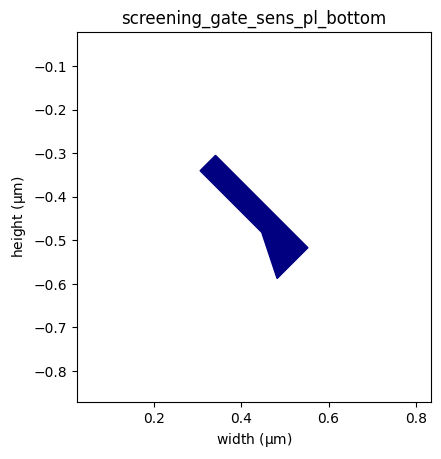

In [108]:
screen_sens_pl_bottom.build()
screen_sens_pl_bottom.plot()

In [109]:
qda.build()

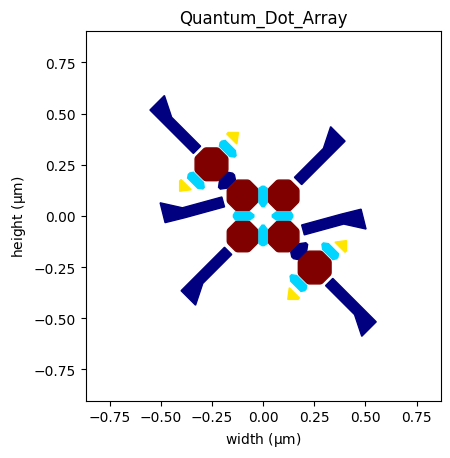

In [110]:
qda.plot()

In [ ]:
qda.elements['screening_gate_pl_0']

## Fanout screening gates

### Plunger screening fanout

Now we still have to add the fanout lines for the screening gates. It follows the same procedure as before.

#### Fanout screening plunger 0

In [111]:
fo_screen_pl_0 = FanOutLine('screening_gate_pl_0', 0, collection, fo_points)

fo_screen_pl_0.fo_direction = 'left'
fo_screen_pl_0.n_fanout = 3

fo_screen_pl_0.fo_line_fine.fo_width_start = screen_pl_0.fo_contact_width
fo_screen_pl_0.fo_line_fine.points_along_path = [[-0.1, 0, 'start'],
                                                 [-0.8, 0.01, 'start'],
                                                 ]
fo.add_component(fo_screen_pl_0)

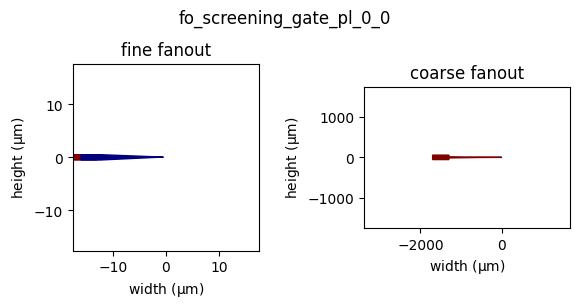

In [112]:
fo_screen_pl_0.plot()

#### Fanout screening plunger 1

In [113]:
fo_screen_pl_1 = FanOutLine('screening_gate_pl_1', 0, collection, fo_points)

fo_screen_pl_1.fo_direction = 'top'
fo_screen_pl_1.n_fanout = -1

fo_screen_pl_1.fo_line_fine.fo_width_start = screen_pl_1.fo_contact_width
fo_screen_pl_1.fo_line_fine.points_along_path = [[0.05, 0.1, 'start'],
                                                 [0.1, 0.3, 'start'],
                                                 ]
fo.add_component(fo_screen_pl_1)

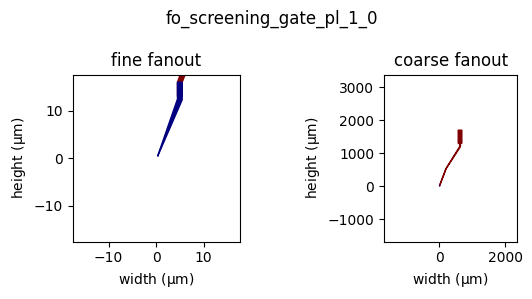

In [114]:
fo_screen_pl_1.plot()

#### Fanout screening plunger 2

In [115]:
fo_screen_pl_2 = FanOutLine('screening_gate_pl_2', 0, collection, fo_points)

fo_screen_pl_2.fo_direction = 'bottom'
fo_screen_pl_2.n_fanout = 0

fo_screen_pl_2.fo_line_fine.fo_width_start = screen_pl_2.fo_contact_width
points = mirror(fo_screen_pl_1.fo_line_fine.points_along_path)
fo_screen_pl_2.fo_line_fine.points_along_path = points

fo.add_component(fo_screen_pl_2)

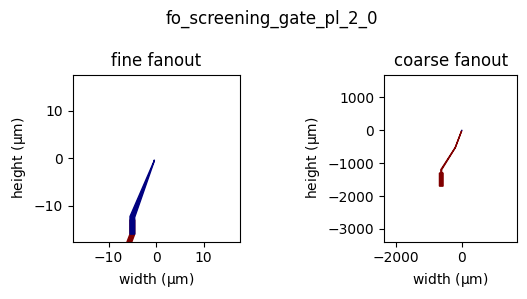

In [116]:
fo_screen_pl_2.plot()

#### Fanout screening plunger 3

In [117]:
fo_screen_pl_3 = FanOutLine('screening_gate_pl_3', 0, collection, fo_points)

fo_screen_pl_3.fo_direction = 'right'
fo_screen_pl_3.n_fanout = 3

fo_screen_pl_3.fo_line_fine.fo_width_start = screen_pl_3.fo_contact_width
points = mirror(fo_screen_pl_0.fo_line_fine.points_along_path)
fo_screen_pl_3.fo_line_fine.points_along_path = points

fo.add_component(fo_screen_pl_3)

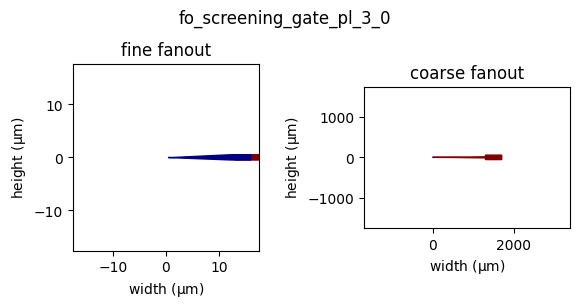

In [118]:
fo_screen_pl_3.plot()

### Sensor plunger screening fanout

#### Fanout screening plunger sensor top

In [119]:
fo_screen_sens_pl_top = FanOutLine('screening_gate_sens_pl_top', 0, collection, fo_points)

fo_screen_sens_pl_top.fo_direction = 'top'
fo_screen_sens_pl_top.n_fanout = 0

fo_screen_sens_pl_top.fo_line_fine.fo_width_start = screen_sens_pl_top.fo_contact_width
fo_screen_sens_pl_top.fo_line_fine.points_along_path = [[-0.05, 0.1, 'start'],
                                                        [-0.2, 0.4, 'start'],
                                                        ]
fo.add_component(fo_screen_sens_pl_top)

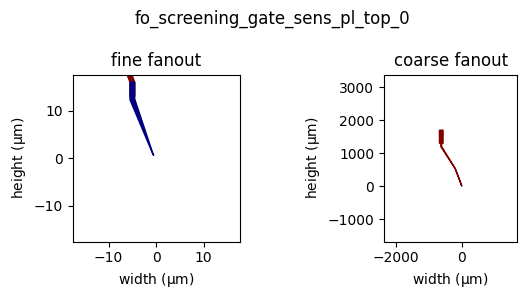

In [120]:
fo_screen_sens_pl_top.plot()

#### Fanout screening plunger sensor bottom

In [121]:
fo_screen_sens_pl_bottom = FanOutLine('screening_gate_sens_pl_bottom', 0, collection, fo_points)

fo_screen_sens_pl_bottom.fo_direction = 'bottom'
fo_screen_sens_pl_bottom.n_fanout = -1

fo_screen_sens_pl_bottom.fo_line_fine.fo_width_start = screen_sens_pl_bottom.fo_contact_width
points = mirror(fo_screen_sens_pl_top.fo_line_fine.points_along_path)
fo_screen_sens_pl_bottom.fo_line_fine.points_along_path = points

fo.add_component(fo_screen_sens_pl_bottom)

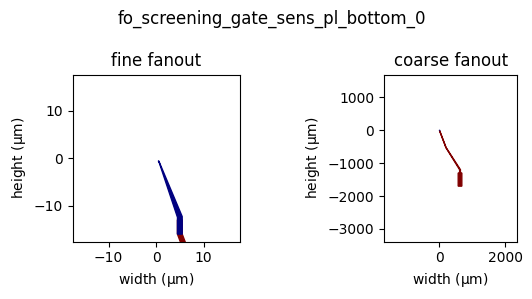

In [122]:
fo_screen_sens_pl_bottom.plot()

## Main cell with fanout

In [123]:
fo_qda = qda.add_component()
fo_qda.component = fo

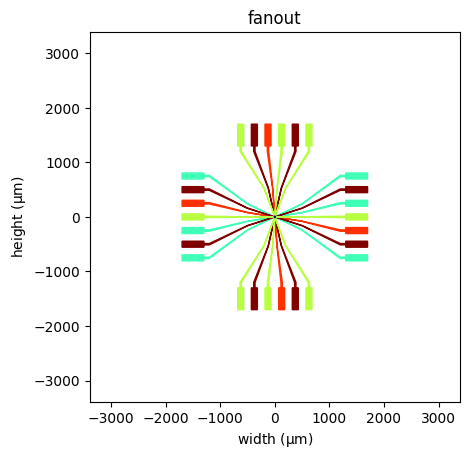

In [124]:
fo.build()
fo.plot()

## Build and save

In [125]:
qda.build()

**Currently there is a bug when plotting the quantum dott array, since the Screening Gate and the Ohmic get shifted. It is a bug in the plot function only since the generated Quantum Dot array is correct.**

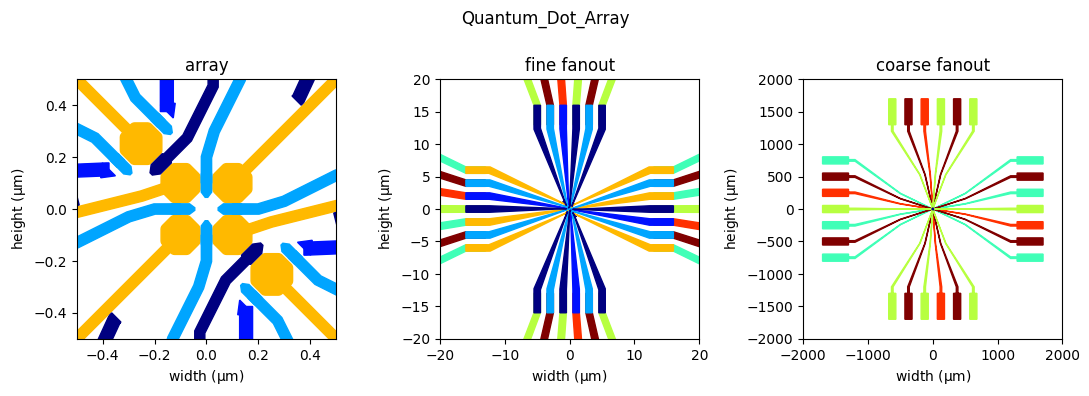

In [131]:
fig, axs = plt.subplots(1, 3, figsize=(11, 4))

qda.plot(axs[0])
qda.plot(axs[1])
qda.plot(axs[2])

axs[0].set_xlim(-0.5, 0.5)
axs[0].set_ylim(-0.5, 0.5)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(qda.name)

plt.tight_layout()

## Save file

We can also add a chip layout file on top of the device, to see whether our fanout and bondpads are aligned with the prefab.

In [127]:
layout = qda.add_chip_layout("chip_layout.gds")

In [129]:
qda.save_as_gds('qdd_test_design_2x2.gds')